Zomata Data Analysis Using Python

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
dataframe=pd.read_csv("Zomato data .csv")
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [24]:
# Let's convert the data type of the 'rate' column to float and remove the denominator

def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [26]:
# 1.What type of restaurant do the majority of customers order from?
# 2.How many votes has each type of restaurant recieved from customers?
# 3.Whatare the ratings that the majority of restaurants have recieved?
# 4.Zomato hs observed that most couples order most pf their food online. What is theie average spending on each order?
# 5.Which type of restaurant recieved more offline orders, so that Zomato can provide those customers with some good offers?

Text(0.5, 0, 'Type of restaurant')

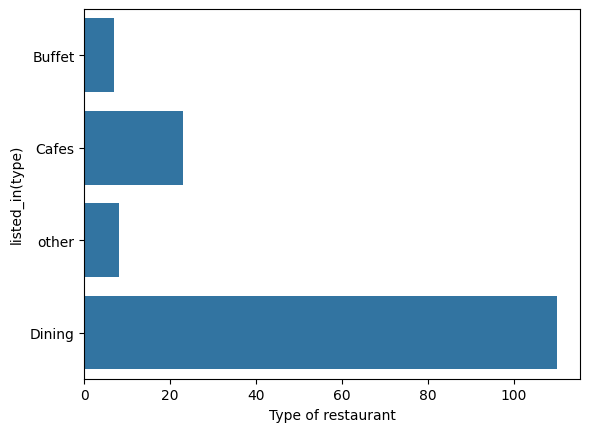

In [27]:
# 1.What type of restaurant do the majority of customers order from?
sns.countplot(dataframe['listed_in(type)'])
plt.xlabel('Type of restaurant')

Text(0, 0.5, 'votes')

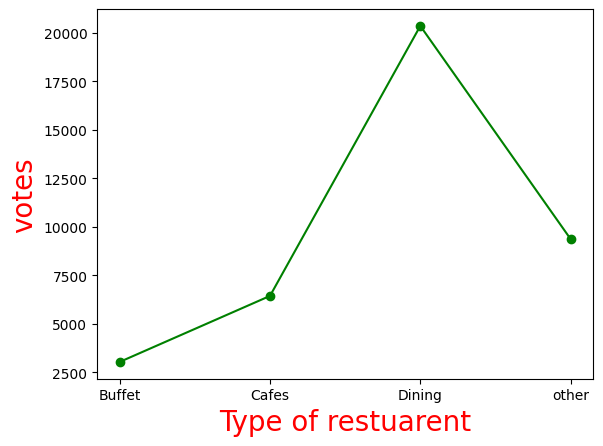

In [28]:
# 2.How many votes has each type of restaurant recieved from customers?

grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Type of restuarent',c='red',size=20)
plt.ylabel('votes',c='red',size=20)

The majority of restaurants recieved rating

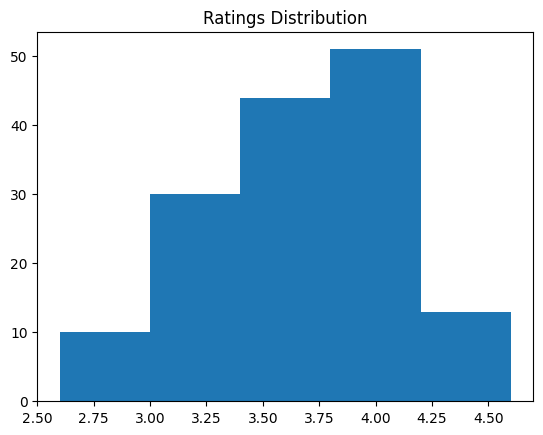

In [29]:
# 3.Whatare the ratings that the majority of restaurants have recieved?

plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

Conclusion: The majority of restaurants recieved ratings from 3.5 to 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

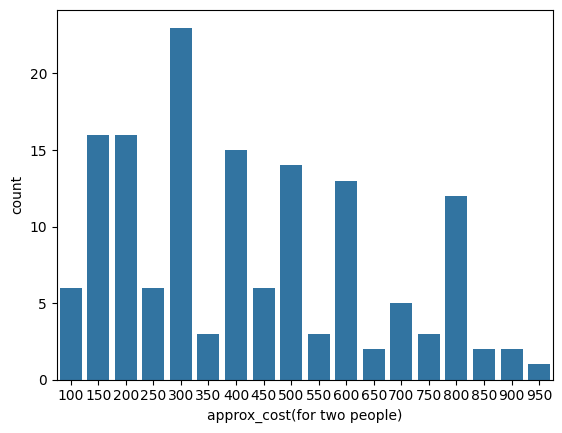

In [30]:
# 4.Zomato hs observed that most couples order most pf their food online. What is theie average spending on each order?

Couple_Data=dataframe['approx_cost(for two people)']
sns.countplot(x=Couple_Data)

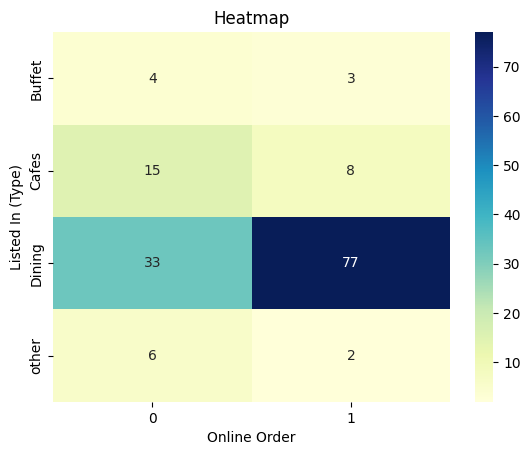

In [36]:
# 5.Which type of restaurant recieved more offline orders, so that Zomato can provide those customers with some good offers?

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')

plt.title("Heatmap")

plt.xlabel("Online Order")

plt.ylabel("Listed In (Type)")

plt.show()

Conclusion: Dining restaurants primarly accept offiline orders, whereas cafes priamrily
recieve online orders. This suggests that clients prefer to place orders in person at restaurants,
but prefer online ordering at cafes.